/Users/HPSahasrabuddhe/opt/miniconda3/envs/carla_mp_api/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/HPSahasrabuddhe/opt/miniconda3/envs/carla_mp_api/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/HPSahasrabuddhe/opt/miniconda3/lib/python3.9/site-packages/mpcontribs/client/__init__.py:88: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
2024-02-12 00:17:35,277 - log.custom_logger - INFO - User input: {'mat1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_


HASHIN-SHTRIKMAN + GENETIC ALGORITHM RECOMMENDED MATERIAL PROPERTIES
  (Phase 1) Electrical conductivity, [S/m]    (Phase 1) Thermal conductivity, [W/m/K]    (Phase 2) Electrical conductivity, [S/m]    (Phase 2) Thermal conductivity, [W/m/K]    (Phase 1) Bulk modulus, [GPa]    (Phase 1) Shear modulus, [GPa]    (Phase 1) Universal anisotropy, []    (Phase 2) Bulk modulus, [GPa]    (Phase 2) Shear modulus, [GPa]    (Phase 2) Universal anisotropy, []    mixing_param    vol_frac    cost
------------------------------------------  -----------------------------------------  ------------------------------------------  -----------------------------------------  -------------------------------  --------------------------------  ------------------------------------  -------------------------------  --------------------------------  ------------------------------------  --------------  ----------  ------
                                  12.8901                                 4.24873e-05       

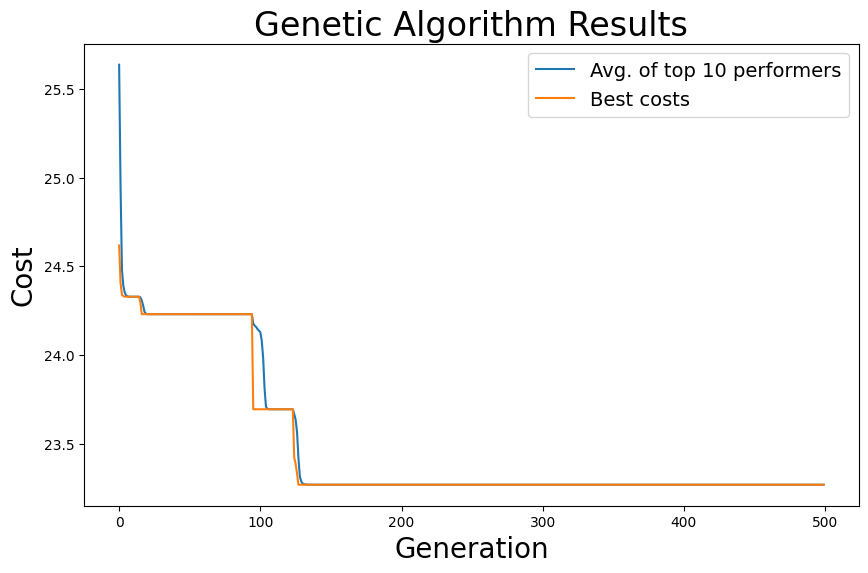

2024-02-12 00:18:14,046 - log.custom_logger - INFO - self.fields: {'material_id': [], 'is_stable': [], 'band_gap': [], 'is_metal': [], 'formula_pretty': [], 'mp-ids-contrib': [], 'elec_cond_300k_low_doping': [], 'therm_cond_300k_low_doping': [], 'bulk_modulus': [], 'shear_modulus': [], 'universal_anisotropy': []}


Retrieving SummaryDoc documents:   0%|          | 0/153235 [00:00<?, ?it/s]

2024-02-12 00:19:51,589 - log.custom_logger - INFO - Process 0: 0 of 100
errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
2024-02-12 00:19:54,603 - log.custom_logger - INFO - Process 0: 1 of 100
2024-02-12 00:19:55,816 - log.custom_logger - INFO - Process 0: 2 of 100
2024-02-12 00:19:59,566 - log.custom_logger - INFO - Process 0: 3 of 100
2024-02-12 00:20:00,489 - log.custom_logger - INFO - Process 0: 4 of 100
2024-02-12 00:20:01,543 - log.custom_logger - INFO - Process 0: 5 of 100
2024-02-12 00:20:02,593 - log.custom_logger - INFO - Process 0: 6 of 100
2024-02-12 00:20:05,105 - log.custom_logger - INFO - Process 0: 7 of 100
2024-02-12 00:20:05,990 - log.custom_logger - INFO - Process 0: 8 of 100
2024-02-12 00:20:07,167 - log.custom_logger - INFO 

In [1]:
from core.optimization import HashinShtrikman
from core.user_input import MaterialProperty, Material, MixtureProperty, Mixture
from log.custom_logger import logger

# Define properties for each material
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.0001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=100, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=100, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2, lower_bound=1),
]

properties_mat_2 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=5, lower_bound=2),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.009, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=200),
    MaterialProperty(prop='shear_modulus', upper_bound=200, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.3, lower_bound=1.3),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat1', properties=properties_mat_1)
mat_2 = Material(name='mat2', properties=properties_mat_2)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mixture]

user_input = {}
for entity in aggregate:
    user_input.update(entity.custom_dict())

logger.info("User input: {}".format(user_input))

# Testing with subset of possible property_docs
api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM"
mp_contribs_project="carrier_transport"


HS = HashinShtrikman(api_key=api_key, 
                     mp_contribs_project=mp_contribs_project,
                     user_input=user_input,)

HS.set_HS_optim_params()
HS.print_table_of_best_designs()
HS.plot_optimization_results()
# with open("consolidated_dict_02_11_2024_08_46_12 copy") as f:
#     consolidated_dict = json.load(f)
consolidated_dict = HS.generate_consolidated_dict(total_docs=100)
mat_1_ids, mat_2_ids = HS.get_material_matches(consolidated_dict)

logger.info("Material 1 Matches: {}".format(mat_1_ids))
logger.info("Material 2 Matches: {}".format(mat_2_ids))

HS.get_material_match_costs(mat_1_ids=mat_1_ids, mat_2_ids=mat_2_ids, consolidated_dict=consolidated_dict)

In [ ]:
mat_1_ids = ["mp-546266", "mp-12863", "mp-1509", "mp-16290"]
mat_2_ids = ["mp-546266", "mp-12863"]

HS.get_material_match_costs(mat_1_ids=mat_1_ids, mat_2_ids=mat_2_ids, consolidated_dict=consolidated_dict)